In [45]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings(action='ignore')

In [8]:
# As i'm gonna find healthy drinks, so i decided to find them based on calories, carb, fat
data = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
data.sort_index()
data = data.rename(columns={'Unnamed: 0': 'Drink_name',
                            'Calories': 'calories', 'Fat (g)': 'fat', 'Carb. (g)': 'carb'})
df = data.drop(['Protein', 'Sodium', 'Fiber (g)'], 1)
df

,Drink_name,calories,fat,carb
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11
1,Ombré Pink Drink,-,-,-
2,Pink Drink,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14
...,...,...,...,...
172,Chocolate Smoothie,320,5,53
173,Strawberry Smoothie,300,2,60
174,Ginger Ale,-,-,-
175,Lemon Ale,-,-,-


In [9]:
# I was worried about duplicated datas, but there's nothing to be worried about. they're same drinks with different flavers.

duplicated = pd.DataFrame(df[df.duplicated()] == "True")
duplicated = duplicated.drop(['Drink_name', 'calories', 'fat', 'carb'], 1)
duplicated_list = []
for item in duplicated.index:
    duplicated_list.append(df['Drink_name'][item])

pd.DataFrame(duplicated_list, columns=['Drink_name'])

,Drink_name
0,Iced Espresso Classics - Vanilla Latte
1,Iced Espresso Classics - Caffe Mocha
2,Iced Espresso Classics - Caramel Macchiato
3,Starbucks® Caramel Iced Coffee
4,Starbucks® Iced Coffee + Milk
5,Starbucks® Low Calorie Iced Coffee + Milk
6,Starbucks® Vanilla Iced Coffee
7,Tazo® Bottled Berry Blossom White
8,Tazo® Bottled Black Mango
9,Tazo® Bottled Black with Lemon


In [42]:
# cleaning non value datas, the reason why i deleted zero calorie, carb and fat drinks is that if they exist, they're not good for your health our aim is to find HEALTHY drinks
df = df.sort_values('calories')
df = df.drop(df[(df.calories == '-') | ((df.calories == '0')
                                        & (df.fat == '0') & (df.carb == '0'))].index)
# Haaaaaard coding:D

In [37]:
cols = ['carb', 'calories', 'fat']
df[cols] = df[cols].astype(float)
df = df.sort_values(by =['calories'], ascending = True)
df = df.reset_index()

,index,Drink_name,calories,fat,carb
0,100,Iced Coffee,5.0,0.0,0.0
1,102,Nariño 70 Cold Brew,5.0,0.0,0.0
2,106,Pike Place® Roast,5.0,0.0,0.0
3,94,Blonde Roast,5.0,0.0,0.0
4,99,Featured Dark Roast,5.0,0.0,0.0


In [60]:
selected = df.loc[(df['calories'] < 100) & (df['calories'] >= 30)]
selected

,index,Drink_name,calories,fat,carb
9,36,Teavana® Shaken Iced Passion Tango™ Tea,30.0,0.0,8.0
10,32,Teavana® Shaken Iced Black Tea,30.0,0.0,8.0
11,34,Teavana® Shaken Iced Green Tea,30.0,0.0,8.0
12,137,Starbucks Doubleshot® on Ice Beverage,45.0,1.0,5.0
13,0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0
14,72,Starbucks® Iced Coffee Light Sweetened,50.0,0.0,11.0
19,71,Starbucks® Iced Coffee Caramel,60.0,0.0,13.0
21,38,Teavana® Shaken Iced Peach Green Tea,60.0,0.0,15.0
18,4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0
20,27,Tazo® Bottled Organic Iced Black Tea,60.0,0.0,15.0


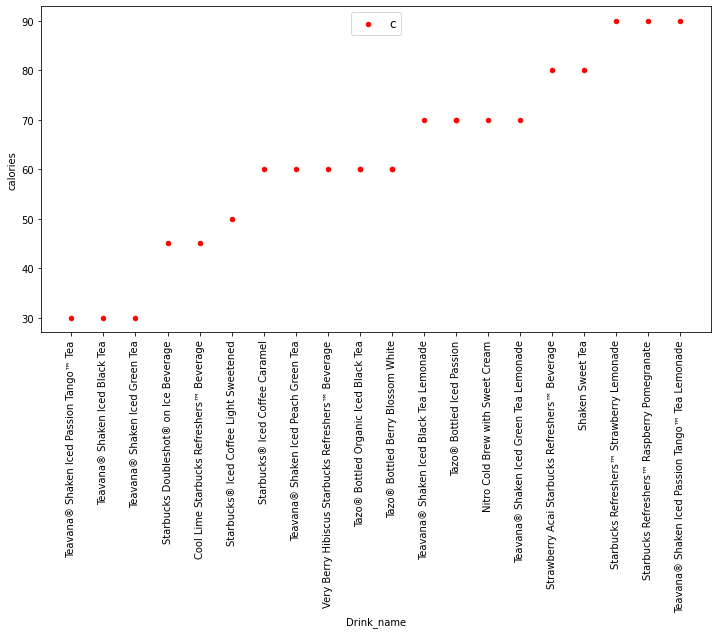

In [86]:

Scatter = selected.plot(figsize = (12,6),kind = 'scatter', x = 'Drink_name', y = 'calories', color = 'red')
plt.xticks(rotation=90)
plt.legend('calories', loc='upper center', fontsize = 12)
plt.show()